<a href="https://colab.research.google.com/github/PosgradoMNA/IAyAA_Equipo_64/blob/main/SVD_Equipo64.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 10**
###**Reducción de Dimensionalidad - Descomposición en Valores Singulares (SVD) y Sistemas de Recomendación**


**Nombres y matrículas de los integrantes del equipo:**

*   Roberto Vega Alanis (A01378921)
*   Diego Alberto Olarte Mira - A01794028
*   Jose Antonio Saenz Ramirez - A01793884
*   Andres Javier Galindo Vargas - A01793927
*   Fredy Reyes Sanchez - A01687370

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [49]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.

## Para manipulació de datos
import pandas as pd
import numpy as np

## Para aplicación de SVD
from sklearn.decomposition import TruncatedSVD

In [50]:
# Eliminacmos restricción de columnas que se puedan mostrar
pd.set_option('max_columns',None)

Se trabajará con el conjunto de datos llamado "Restaurant & consumer", para la generación de un 
sistema de recomendación. Estos sistemas están dentro de los llamados métodos no supervisados y que 
se basan en técnicas de reducción de dimensionalidad. 
El archivo a descargar se llama RCdata.zip y se encuentra en la siguiente liga del repositorio de la UCI: 
https://archive.ics.uci.edu/ml/datasets/Restaurant+%26+consumer+data  
En particular se trabajará con los siguientes archvios, los cuales contienen la información mínima que 
requerimos para esta actividad: rating_final.csv y geoplaces2.csv. 

#**Ejercicio-1.** 

1. Descarga los archivos y genera la matriz de utilidad en la cual los renglones son los usuarios
(user_ID), las columnas los nombres de los restaurantes (name) y las entradas la evaluaciones
generales dadas por los usuarios (rating). En particular indica el tamaño de dicha matriz y despliega
sus primeros 10 renglones.

In [51]:
# Obtención de urls con archivos de datasets cargados
url_rating = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-de-aprendizaje-RobVegaTec/main/iayaa/semana10/datasets/rating_final.csv'
url_geo = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-de-aprendizaje-RobVegaTec/main/iayaa/semana10/datasets/geoplaces2.csv'

In [52]:
# Creación de DataFrame de rating
df_rating = pd.read_csv(url_rating)
df_rating

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


In [53]:
# Creación de DataFrame de rating
df_geo = pd.read_csv(url_geo, encoding = 'latin-1')
df_geo

,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,fax,zip,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,?,?,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,?,78280,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,?,78000,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,?,?,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,?,?,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,132866,22.141220,-100.931311,0101000020957F000013871838EC4A58C1B5DF74F8E396...,Chaires,Ricardo B. Anaya,San Luis Potosi,San Luis Potosi,Mexico,?,?,No_Alcohol_Served,not permitted,informal,completely,medium,?,familiar,f,closed,none
126,135072,22.149192,-101.002936,0101000020957F0000E7B79B1DB94758C1D29BC363D8AA...,Sushi Itto,Venustiano Carranza 1809 C Polanco,San Luis Potosi,SLP,Mexico,?,78220,No_Alcohol_Served,none,informal,no_accessibility,medium,sushi-itto.com.mx,familiar,f,closed,none
127,135109,18.921785,-99.235350,0101000020957F0000A6BF695F136F5AC1DADF87B20556...,Paniroles,?,?,?,?,?,?,Wine-Beer,not permitted,informal,no_accessibility,medium,?,quiet,f,closed,Internet
128,135019,18.875011,-99.159422,0101000020957F0000B49B2E5C6E785AC12F9D58435241...,Restaurant Bar Coty y Pablo,Paseo de Las Fuentes 24 Pedregal de Las Fuentes,Jiutepec,Morelos,Mexico,?,?,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,closed,none


In [54]:
# Combinación de los datasets
df_merge = pd.merge(df_rating[['userID','placeID','rating']],df_geo[['placeID','name']],on = 'placeID')
df_merge

,userID,placeID,rating,name
0,U1077,135085,2,Tortas Locas Hipocampo
1,U1108,135085,1,Tortas Locas Hipocampo
2,U1081,135085,1,Tortas Locas Hipocampo
3,U1056,135085,2,Tortas Locas Hipocampo
4,U1134,135085,2,Tortas Locas Hipocampo
...,...,...,...,...
1156,U1061,132958,2,tacos los volcanes
1157,U1025,132958,1,tacos los volcanes
1158,U1097,132958,2,tacos los volcanes
1159,U1096,132958,1,tacos los volcanes


In [55]:
# Creación de matriz de utilidad: los renglones son los usuarios (user_ID), las columnas los nombres de los restaurantes (name)
matriz_utilidad = df_merge.pivot_table(values = 'rating', index = 'userID', columns = 'name', fill_value = 0)
matriz_utilidad

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,Chaires,Chilis Cuernavaca,Dominos Pizza,El Club,El Herradero Restaurante and Bar,El Mundo de la Pasta,El Oceano Dorado,El Rincon de San Francisco,El Rincón de San Francisco,El angel Restaurante,El cotorreo,Giovannis,Gordas de morales,Gorditas Doa Gloria,Gorditas Dona Tota,Hamburguesas La perica,Hamburguesas Valle Dorado,Hamburguesas saul,KFC,Kiku Cuernavaca,Koye Sushi,La Cantina Restaurante,La Estrella de Dimas,La Fontana Pizza Restaurante and Cafe,La Posada del Virrey,La Virreina,Little Cesarz,Log Yin,Los Vikingos,Luna Cafe,Mariscos El Pescador,Mariscos Tia Licha,McDonalds Centro,Mcdonalds Parque Tangamanga,Michiko Restaurant Japones,Mikasa,Paniroles,Pizzeria Julios,Pollo_Frito_Buenos_Aires,Potzocalli,Preambulo Wifi Zone Cafe,Restaurant Bar Coty y Pablo,Restaurant Bar Hacienda los Martinez,Restaurant El Muladar de Calzada,Restaurant Familiar El Chino,Restaurant Las Mananitas,Restaurant Oriental Express,Restaurant Orizatlan,Restaurant Teely,Restaurant Wu Zhuo Yi,Restaurant and Bar and Clothesline Carlos N Charlies,Restaurant de Mariscos de Picon,Restaurant la Chalita,Restaurant los Compadres,Restaurant los Pinos,Restaurante 75,Restaurante Alhondiga,Restaurante Bar El Gallinero,Restaurante Bar Fu-hao,Restaurante Casa de las Flores,Restaurante El Chivero S.A. de C.V.,Restaurante El Cielo Potosino,Restaurante El Reyecito,Restaurante Guerra,Restaurante Marisco Sam,Restaurante Pueblo Bonito,Restaurante Tiberius,Restaurante Versalles,Restaurante de Mariscos la Langosta,Restaurante la Cantina,Restaurante la Estrella de Dima,Restaurante la Gran Via,Restaurante la Parroquia Potosina,Restaurante y Pescaderia Tampico,Rincon Huasteco,Rincon del Bife,Sanborns Casa Piedra,Sirlone,Subway,Sushi Itto,TACOS CORRECAMINOS,TACOS EL GUERO,Taqueria EL amigo,Tortas Locas Hipocampo,Tortas y hamburguesas el gordo,Unicols Pizza,VIPS,Vips,cafe ambar,cafe punta del cielo,carnitas mata calle Emilio Portes Gil,carnitas_mata,churchs,crudalia,dairy queen,don burguers,el lechon potosino,el pueblito,emilianos,la Cantina,la Cochinita Pibil Restaurante Yucateco,la Estrella de Dimas,la parroquia,la perica hamburguesa,little pizza Emilio Portes Gil,los Toneles,palomo tec,pizza clasica,puesto de gorditas,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
U1001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
U1002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
U1003,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,2,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,2,0,0,0,0,0,0,0,0
U1004,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
U1005,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [56]:
# Indica el tamaño de dicha matriz
print('Tamaño de conjunto de datos:', matriz_utilidad.size)
print('Tenemos {} usuarios y {} lugares'.format(matriz_utilidad.shape[0],matriz_utilidad.shape[1]))   # Tenemos 943 usuarios y 1664 películas)

Tamaño de conjunto de datos: 17802
Tenemos 138 usuarios y 129 lugares


In [57]:
# Despliega sus primeros 10 renglones
matriz_utilidad.head(10)

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,Chaires,Chilis Cuernavaca,Dominos Pizza,El Club,El Herradero Restaurante and Bar,El Mundo de la Pasta,El Oceano Dorado,El Rincon de San Francisco,El Rincón de San Francisco,El angel Restaurante,El cotorreo,Giovannis,Gordas de morales,Gorditas Doa Gloria,Gorditas Dona Tota,Hamburguesas La perica,Hamburguesas Valle Dorado,Hamburguesas saul,KFC,Kiku Cuernavaca,Koye Sushi,La Cantina Restaurante,La Estrella de Dimas,La Fontana Pizza Restaurante and Cafe,La Posada del Virrey,La Virreina,Little Cesarz,Log Yin,Los Vikingos,Luna Cafe,Mariscos El Pescador,Mariscos Tia Licha,McDonalds Centro,Mcdonalds Parque Tangamanga,Michiko Restaurant Japones,Mikasa,Paniroles,Pizzeria Julios,Pollo_Frito_Buenos_Aires,Potzocalli,Preambulo Wifi Zone Cafe,Restaurant Bar Coty y Pablo,Restaurant Bar Hacienda los Martinez,Restaurant El Muladar de Calzada,Restaurant Familiar El Chino,Restaurant Las Mananitas,Restaurant Oriental Express,Restaurant Orizatlan,Restaurant Teely,Restaurant Wu Zhuo Yi,Restaurant and Bar and Clothesline Carlos N Charlies,Restaurant de Mariscos de Picon,Restaurant la Chalita,Restaurant los Compadres,Restaurant los Pinos,Restaurante 75,Restaurante Alhondiga,Restaurante Bar El Gallinero,Restaurante Bar Fu-hao,Restaurante Casa de las Flores,Restaurante El Chivero S.A. de C.V.,Restaurante El Cielo Potosino,Restaurante El Reyecito,Restaurante Guerra,Restaurante Marisco Sam,Restaurante Pueblo Bonito,Restaurante Tiberius,Restaurante Versalles,Restaurante de Mariscos la Langosta,Restaurante la Cantina,Restaurante la Estrella de Dima,Restaurante la Gran Via,Restaurante la Parroquia Potosina,Restaurante y Pescaderia Tampico,Rincon Huasteco,Rincon del Bife,Sanborns Casa Piedra,Sirlone,Subway,Sushi Itto,TACOS CORRECAMINOS,TACOS EL GUERO,Taqueria EL amigo,Tortas Locas Hipocampo,Tortas y hamburguesas el gordo,Unicols Pizza,VIPS,Vips,cafe ambar,cafe punta del cielo,carnitas mata calle Emilio Portes Gil,carnitas_mata,churchs,crudalia,dairy queen,don burguers,el lechon potosino,el pueblito,emilianos,la Cantina,la Cochinita Pibil Restaurante Yucateco,la Estrella de Dimas,la parroquia,la perica hamburguesa,little pizza Emilio Portes Gil,los Toneles,palomo tec,pizza clasica,puesto de gorditas,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
U1001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
U1002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
U1003,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,2,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,2,0,0,0,0,0,0,0,0
U1004,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
U1005,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#**Ejercicio-2.**

2.  Con el objetivo de obtener la información con respecto a los vectores latentes de los restaurantes, 
obtener dicha factorización SVD utilizando todas las componentes posibles, es decir, usando todos 
sus valores singulares. En particular indica la cantidad de valores singulares obtenidos. 

In [58]:
X = matriz_utilidad.T     # Tomamos la traspuesta para que los renglones sean las películas y las columnas los usuarios.
X.shape

(129, 138)

In [59]:
# El número de componentes debe ser menor que el número de características (features/usuarios), que son 138:
SVD = TruncatedSVD(n_components=max(X.shape) -1, random_state=1)  
resultant_matrix = SVD.fit_transform(X)

In [60]:
# Cantidad de valores singulares obtenidos
resultant_matrix.shape

(129, 129)

###############################################

**Respuesta:** el total de vectores singulares son 129.

#**Ejercicio-3.**

3.  Usando la métrica de correlación de Pearon, obtener las 10 mejores recomendaciones de este 
modelo no supervisado con base a la información de alguien que evaluó bien de manera general al 
“Subway”. Despliega también el valor numérico de la correlación de Pearson de cada una de estas 10 
recomendaciones. NOTA: No debe estar incluido “Subway” dentro de las recomendaciones. 

In [61]:
# Obtengamos la matriz de correlación de Pearson entre todas las 
# variables latentes de las películas:

corrMx = np.corrcoef(resultant_matrix, )
corrMx.shape

(129, 129)

In [62]:
# Forma notebook Dr. Falcon
me_gusta = "Subway"

names = matriz_utilidad.columns
names_list = list(names)
id_megusta = names_list.index(me_gusta)

# Correlación de esta película, con todas las que se tienen en el catálogo:
corr_recomienda = corrMx[id_megusta]

# Obtención de DataFrame con correlaciones de la selección
recom = list(X.index)
corr_recom = corr_recomienda[X.index.get_indexer(recom)]
df_top = pd.DataFrame(zip(recom,corr_recom), columns = ['Place','Correlación'])

# Obtención del top 10 de recomendaciones (excluyendo a la misma selección)
df_top.sort_values('Correlación',ascending = False)[1:11]

,Place,Correlación
58,Restaurant Teely,0.609521
97,Vips,0.506278
85,Rincon del Bife,0.429824
60,Restaurant and Bar and Clothesline Carlos N Ch...,0.425467
86,Sanborns Casa Piedra,0.417219
41,Mariscos Tia Licha,0.388178
11,Chilis Cuernavaca,0.301090
45,Mikasa,0.301002
64,Restaurant los Pinos,0.285149
37,Log Yin,0.234634


In [63]:
# Forma RVA

# Índice del restaurante Subway en la matriz de utilidad
seleccion = X.index.get_loc('Subway')

# Correlación de esta película, con todas las que se tienen en el catálogo:
corr_recomienda = corrMx[seleccion]

# Obtención de DataFrame con correlaciones de la selección
recom = list(X.index)
corr_recom = corr_recomienda[X.index.get_indexer(recom)]
df_top = pd.DataFrame(zip(recom,corr_recom), columns = ['Place','Correlación'])

# Obtención del top 10 de recomendaciones (excluyendo a la misma selección)
result_r_ac = df_top.sort_values('Correlación',ascending = False)[1:11]
result_r_ac

,Place,Correlación
58,Restaurant Teely,0.609521
97,Vips,0.506278
85,Rincon del Bife,0.429824
60,Restaurant and Bar and Clothesline Carlos N Ch...,0.425467
86,Sanborns Casa Piedra,0.417219
41,Mariscos Tia Licha,0.388178
11,Chilis Cuernavaca,0.301090
45,Mikasa,0.301002
64,Restaurant los Pinos,0.285149
37,Log Yin,0.234634


#**Ejercicio-4.**

4.  Disminuye ahora la dimensión de la factorización con un número de componentes tal, que las 
recomendaciones con esta menor cantidad de información coincidan en al menos 9 de las 10 
recomendaciones dadas con todos los valores singulares. Indica la cantidad de valores singulares 
encontrado y la cantidad de información que contienen. 

In [64]:
 # El número de componentes debe ser menor que el número de características (features/usuarios), que son 138:
SVD_trunc = TruncatedSVD(n_components=max(X.shape)-1, random_state=1)  
SVD_trunc.fit(X)
num_sv = 79   # En particular los 10 primeros vectores y valores singulares de mayor magnitud tienen esta cantidad de información.
print('Cantidad de información contenida con los primeros %d vectores singulares:' % num_sv)
print('%.1f%%' %  (100 * ((SVD_trunc.singular_values_[0:num_sv]).sum() / (SVD_trunc.singular_values_).sum())))

Cantidad de información contenida con los primeros 79 vectores singulares:
90.1%


**Respuesta:** La cantidad de información contenida con los primeros 79 vectores singulares:
90.1%

## Indicación adicional:

Con base en investigación bibliográfica adiciobnal, es interesante hacer notar que esta determinación puede llegar a ser cotradecida si se utiliza la aproximación por medio de la variación del número de componentes seleccionados en la creación de múltiples SVD truncados y utilizamos el atributo "explained_variance_ratio". Con ello, la cantidad de componentes se reduce a 55 para la obtención del 90% de los datos originales.



Referencia:

Sawant, Mrunal (2019) Truncated Singular Value Decompositin (SVD) using Amazon Food Reviews, Medium. Obtenido de : https://medium.com/swlh/truncated-singular-value-decomposition-svd-using-amazon-food-reviews-891d97af5d8d

Número de componentes = 4 y su varianza explicada = 0.2481365139983343
Número de componentes = 10 y su varianza explicada = 0.4347544506485382
Número de componentes = 15 y su varianza explicada = 0.5425441467245312
Número de componentes = 20 y su varianza explicada = 0.6299114422459553
Número de componentes = 50 y su varianza explicada = 0.8960522401318289
Número de componentes = 55 y su varianza explicada = 0.9185671338591102
Número de componentes = 60 y su varianza explicada = 0.9363500208811935
Número de componentes = 70 y su varianza explicada = 0.9632150793974525
Número de componentes = 80 y su varianza explicada = 0.980430263973048
Número de componentes = 90 y su varianza explicada = 0.9909065905488748
Número de componentes = 100 y su varianza explicada = 0.99652683394344
Número de componentes = 120 y su varianza explicada = 0.99993183468128


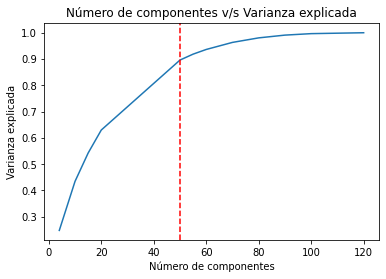

In [65]:
# Obtención del número óptimo de componentes para Truncated SVD
import matplotlib.pyplot as plt
n_comp = [4,10,15,20,50,55,60,70,80,90,100,120] # valore de entrada para el número de componentes
explained = [] # Varianza explicada ratio por cada componente de Truncated SVD
for x in n_comp:
    svd = TruncatedSVD(n_components=x)
    svd.fit(X)
    explained.append(svd.explained_variance_ratio_.sum())
    print("Número de componentes = %r y su varianza explicada = %r"%(x,svd.explained_variance_ratio_.sum()))

## Impresión de curva de varianza acumulada según el número de componentes
plt.plot(n_comp, explained)
plt.xlabel('Número de componentes')
plt.ylabel("Varianza explicada")
plt.title("Número de componentes v/s Varianza explicada")
plt.axvline(50,color = 'red',linestyle = '--')
plt.show()

Evaluamos el desempeño del modelo con menor cantidad de componentes

In [66]:
X = matriz_utilidad.T

In [67]:
# El número de componentes será el obtenido para contener el 90% de los resultados
SVD_trunc_opt = TruncatedSVD(n_components=55, random_state=1)  
resultant_matrix_trunc_opt = SVD_trunc_opt.fit_transform(X)

# Matriz de correlación
corrMx_trunc_opt = np.corrcoef(resultant_matrix_trunc_opt, )

# Índice del restaurante Subway en la matriz de utilidad
seleccion_trunc = X.index.get_loc('Subway')

# Correlación de esta película, con todas las que se tienen en el catálogo:
corr_recomienda_trunc = corrMx_trunc_opt[seleccion_trunc]

# Obtención de DataFrame con correlaciones de la selección
recom_trunc = list(X.index)
corr_recom_trunc = corr_recomienda_trunc[X.index.get_indexer(recom_trunc)]
df_top_trunc = pd.DataFrame(zip(recom_trunc,corr_recom_trunc), columns = ['Place','Correlación'])

# Obtención del top 10 de recomendaciones (excluyendo a la misma selección)
result_r_trunc = df_top_trunc.sort_values('Correlación',ascending = False)[1:11]
result_r_trunc

,Place,Correlación
58,Restaurant Teely,0.780050
85,Rincon del Bife,0.698024
97,Vips,0.598638
60,Restaurant and Bar and Clothesline Carlos N Ch...,0.531658
45,Mikasa,0.501510
86,Sanborns Casa Piedra,0.449845
41,Mariscos Tia Licha,0.421817
11,Chilis Cuernavaca,0.342572
64,Restaurant los Pinos,0.296544
46,Paniroles,0.241298


Observamos que con 55 componentes, el sistema de recomendación mantiene 9 de las 10 recomendaciones originales, sin embargo, modifica la jerarquía (el orden) de recomendación. Por lo tanto, se procede a intentar con 79 componentes.

In [68]:
# El número de componentes será el obtenido para contener el 90% de los resultados
SVD_trunc_opt2 = TruncatedSVD(n_components=79, random_state=1)  
resultant_matrix_trunc_opt2 = SVD_trunc_opt2.fit_transform(X)

corrMx_trunc_opt2 = np.corrcoef(resultant_matrix_trunc_opt2, )


# Índice del restaurante Subway en la matriz de utilidad
seleccion = X.index.get_loc('Subway')

# Correlación de esta película, con todas las que se tienen en el catálogo:
corr_recomienda = corrMx_trunc_opt[seleccion]

# Obtención de DataFrame con correlaciones de la selección
recom = list(X.index)
corr_recom = corr_recomienda[X.index.get_indexer(recom)]
df_top = pd.DataFrame(zip(recom,corr_recom), columns = ['Place','Correlación'])

# Obtención del top 10 de recomendaciones (excluyendo a la misma selección)
df_top.sort_values('Correlación',ascending = False)[1:11]

,Place,Correlación
58,Restaurant Teely,0.780050
85,Rincon del Bife,0.698024
97,Vips,0.598638
60,Restaurant and Bar and Clothesline Carlos N Ch...,0.531658
45,Mikasa,0.501510
86,Sanborns Casa Piedra,0.449845
41,Mariscos Tia Licha,0.421817
11,Chilis Cuernavaca,0.342572
64,Restaurant los Pinos,0.296544
46,Paniroles,0.241298


Observamos que se obtiene exactamente el mismo resultado con la misma con una mayor cantidad de componentes con lo que que se concluye que se puede utilizar el método de explained_variance_ratio para la selección de componentes mínimo por igual.

#**Ejercicio-5.**

5. Repite el ejercicio con el restaurante “"tacos de barbacoa enfrente del Tec". Incluye tus conclusiones. 

In [69]:
"tacos de barbacoa enfrente del Tec"

'tacos de barbacoa enfrente del Tec'

In [70]:
# Índice del restaurante Subway en la matriz de utilidad
seleccion = X.index.get_loc("tacos de barbacoa enfrente del Tec")

# Correlación de esta película, con todas las que se tienen en el catálogo:
corr_recomienda = corrMx[seleccion]


# Obtención de DataFrame con correlaciones de la selección
recom = list(X.index)
corr_recom = corr_recomienda[X.index.get_indexer(recom)]
df_top = pd.DataFrame(zip(recom,corr_recom), columns = ['Place','Correlación'])

# Obtención del top 10 de recomendaciones (excluyendo a la misma selección)
df_top.sort_values('Correlación',ascending = False)[1:11]

,Place,Correlación
128,vips,0.817189
123,tacos abi,0.665305
114,little pizza Emilio Portes Gil,0.653849
92,Taqueria EL amigo,0.437184
118,puesto de gorditas,0.412765
8,Carreton de Flautas y Migadas,0.407795
36,Little Cesarz,0.258479
116,palomo tec,0.195174
25,Hamburguesas La perica,0.191120
100,carnitas mata calle Emilio Portes Gil,0.170939


Se incluye la siguiente prueba con una cantidad truncada de valores singulares:

In [71]:
 # El número de componentes debe ser menor que el número de características (features/usuarios), que son 138:
SVD_trunc = TruncatedSVD(n_components=max(X.shape)-1, random_state=1)  
SVD_trunc.fit(X)
num_sv = 79   # En particular los 10 primeros vectores y valores singulares de mayor magnitud tienen esta cantidad de información.
print('Cantidad de información contenida con los primeros %d vectores singulares:' % num_sv)
print('%.1f%%' %  (100 * ((SVD_trunc.singular_values_[0:num_sv]).sum() / (SVD_trunc.singular_values_).sum())))

Cantidad de información contenida con los primeros 79 vectores singulares:
90.1%


In [72]:
# El número de componentes será el obtenido para contener el 90% de los resultados
SVD_trunc_opt = TruncatedSVD(n_components=79, random_state=1)  
resultant_matrix_trunc_opt = SVD_trunc_opt.fit_transform(X)

# Matriz de correlación
corrMx_trunc_opt = np.corrcoef(resultant_matrix_trunc_opt, )

# Índice del restaurante Subway en la matriz de utilidad
seleccion_trunc = X.index.get_loc("tacos de barbacoa enfrente del Tec")

# Correlación de esta película, con todas las que se tienen en el catálogo:
corr_recomienda_trunc = corrMx_trunc_opt[seleccion_trunc]

# Obtención de DataFrame con correlaciones de la selección
recom_trunc = list(X.index)
corr_recom_trunc = corr_recomienda_trunc[X.index.get_indexer(recom_trunc)]
df_top_trunc = pd.DataFrame(zip(recom_trunc,corr_recom_trunc), columns = ['Place','Correlación'])

# Obtención del top 10 de recomendaciones (excluyendo a la misma selección)
result_r_trunc = df_top_trunc.sort_values('Correlación',ascending = False)[1:11]
result_r_trunc

,Place,Correlación
114,little pizza Emilio Portes Gil,0.864997
128,vips,0.857618
123,tacos abi,0.845728
118,puesto de gorditas,0.570818
92,Taqueria EL amigo,0.521177
8,Carreton de Flautas y Migadas,0.506871
36,Little Cesarz,0.315863
101,carnitas_mata,0.265001
25,Hamburguesas La perica,0.203140
100,carnitas mata calle Emilio Portes Gil,0.177865


Conclusiones:

En primera instancia, es interesante observar cómo el mismo sistema de recomendación con todos sus componentes logra brindar recomendaciones que por su nombre suenan coherentes, al expresar nombres de restaurantes cercanos al utilizado como selección.

En segundo lugar, puede notarse un comportamiento al de caso de lo ejercicios anteriores en donde, al reducir el número de componentes utilizado, se llegan a recomendar 9 de lo 10 lugares recomendados originalmente, modificando casi por completo su orden en cuanto a su correlación con la selección.

Esto es importante hacerse notar ya que todas las recomendaciones solamente se realizan con base en los ratings dados por varios usuarios sobro el conjunto de restaurantes y sin siquiera incluir información geográfica de los mismos.



#**Ejercicio-6.**

6.  Repite los ejercicios 1 a 4 generando ahora la matriz de utilidad en la cual los renglones son los 
usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la 
evaluación dada a la comida (food_rating). Incluye tus conclusiones. 

Ejercicio 1

In [73]:
# Combinación de los datasets
df_merge_fr = pd.merge(df_rating[['userID','placeID','food_rating']],df_geo[['placeID','name']],on = 'placeID')
df_merge_fr

,userID,placeID,food_rating,name
0,U1077,135085,2,Tortas Locas Hipocampo
1,U1108,135085,2,Tortas Locas Hipocampo
2,U1081,135085,2,Tortas Locas Hipocampo
3,U1056,135085,2,Tortas Locas Hipocampo
4,U1134,135085,1,Tortas Locas Hipocampo
...,...,...,...,...
1156,U1061,132958,2,tacos los volcanes
1157,U1025,132958,0,tacos los volcanes
1158,U1097,132958,1,tacos los volcanes
1159,U1096,132958,2,tacos los volcanes


In [74]:
# Creación de matriz de utilidad: los renglones son los usuarios (user_ID), las columnas los nombres de los restaurantes (name)
matriz_utilidad_fr = df_merge_fr.pivot_table(values = 'food_rating', index = 'userID', columns = 'name', fill_value = 0)
matriz_utilidad_fr

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,Chaires,Chilis Cuernavaca,Dominos Pizza,El Club,El Herradero Restaurante and Bar,El Mundo de la Pasta,El Oceano Dorado,El Rincon de San Francisco,El Rincón de San Francisco,El angel Restaurante,El cotorreo,Giovannis,Gordas de morales,Gorditas Doa Gloria,Gorditas Dona Tota,Hamburguesas La perica,Hamburguesas Valle Dorado,Hamburguesas saul,KFC,Kiku Cuernavaca,Koye Sushi,La Cantina Restaurante,La Estrella de Dimas,La Fontana Pizza Restaurante and Cafe,La Posada del Virrey,La Virreina,Little Cesarz,Log Yin,Los Vikingos,Luna Cafe,Mariscos El Pescador,Mariscos Tia Licha,McDonalds Centro,Mcdonalds Parque Tangamanga,Michiko Restaurant Japones,Mikasa,Paniroles,Pizzeria Julios,Pollo_Frito_Buenos_Aires,Potzocalli,Preambulo Wifi Zone Cafe,Restaurant Bar Coty y Pablo,Restaurant Bar Hacienda los Martinez,Restaurant El Muladar de Calzada,Restaurant Familiar El Chino,Restaurant Las Mananitas,Restaurant Oriental Express,Restaurant Orizatlan,Restaurant Teely,Restaurant Wu Zhuo Yi,Restaurant and Bar and Clothesline Carlos N Charlies,Restaurant de Mariscos de Picon,Restaurant la Chalita,Restaurant los Compadres,Restaurant los Pinos,Restaurante 75,Restaurante Alhondiga,Restaurante Bar El Gallinero,Restaurante Bar Fu-hao,Restaurante Casa de las Flores,Restaurante El Chivero S.A. de C.V.,Restaurante El Cielo Potosino,Restaurante El Reyecito,Restaurante Guerra,Restaurante Marisco Sam,Restaurante Pueblo Bonito,Restaurante Tiberius,Restaurante Versalles,Restaurante de Mariscos la Langosta,Restaurante la Cantina,Restaurante la Estrella de Dima,Restaurante la Gran Via,Restaurante la Parroquia Potosina,Restaurante y Pescaderia Tampico,Rincon Huasteco,Rincon del Bife,Sanborns Casa Piedra,Sirlone,Subway,Sushi Itto,TACOS CORRECAMINOS,TACOS EL GUERO,Taqueria EL amigo,Tortas Locas Hipocampo,Tortas y hamburguesas el gordo,Unicols Pizza,VIPS,Vips,cafe ambar,cafe punta del cielo,carnitas mata calle Emilio Portes Gil,carnitas_mata,churchs,crudalia,dairy queen,don burguers,el lechon potosino,el pueblito,emilianos,la Cantina,la Cochinita Pibil Restaurante Yucateco,la Estrella de Dimas,la parroquia,la perica hamburguesa,little pizza Emilio Portes Gil,los Toneles,palomo tec,pizza clasica,puesto de gorditas,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
U1001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
U1002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
U1003,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,2,0,2,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,2,0,0,0,0,0,0,0,0
U1004,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
U1005,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Ejercicio 2

In [75]:
# Transposición de matriz de utilidad
X_fr = matriz_utilidad_fr.T     # Tomamos la traspuesta para que los renglones sean las películas y las columnas los usuarios.
X_fr.shape

(129, 138)

In [76]:
# El número de componentes debe ser menor que el número de características (features/usuarios), que son 138:
SVD_fr = TruncatedSVD(n_components=max(X_fr.shape) -1, random_state=1)  
resultant_matrix_fr = SVD_fr.fit_transform(X_fr)

Ejercicio 3

In [77]:
# Matriz de correlación
corrMx_fr = np.corrcoef(resultant_matrix_fr, )

# Índice del restaurante Subway en la matriz de utilidad
seleccion_fr = X_fr.index.get_loc('Subway')

# Correlación de esta película, con todas las que se tienen en el catálogo:
corr_recomienda_fr = corrMx_fr[seleccion_fr]


# Obtención de DataFrame con correlaciones de la selección
recom_fr = list(X_fr.index)
corr_recom_fr = corr_recomienda_fr[X_fr.index.get_indexer(recom_fr)]
df_top_fr = pd.DataFrame(zip(recom_fr,corr_recom_fr), columns = ['Place','Correlación'])

# Obtención del top 10 de recomendaciones (excluyendo a la misma selección)
result_fr_ac = df_top_fr.sort_values('Correlación',ascending = False)[1:11]
result_fr_ac

,Place,Correlación
58,Restaurant Teely,0.816413
60,Restaurant and Bar and Clothesline Carlos N Ch...,0.468950
97,Vips,0.442148
41,Mariscos Tia Licha,0.415222
85,Rincon del Bife,0.381819
86,Sanborns Casa Piedra,0.365657
55,Restaurant Las Mananitas,0.331707
46,Paniroles,0.312082
29,Kiku Cuernavaca,0.250357
54,Restaurant Familiar El Chino,0.232708


Ejercicio 4

In [78]:
 # El número de componentes debe ser menor que el número de características (features/usuarios), que son 138:
SVD_trunc_fr = TruncatedSVD(n_components=max(X_fr.shape)-1, random_state=1)  
SVD_trunc_fr.fit(X_fr)
num_sv = 80   # En particular los N primeros vectores y valores singulares de mayor magnitud tienen esta cantidad de información.
print('Cantidad de información contenida con los primeros %d vectores singulares:' % num_sv)
print('%.1f%%' %  (100 * ((SVD_trunc_fr.singular_values_[0:num_sv]).sum() / (SVD_trunc_fr.singular_values_).sum())))

Cantidad de información contenida con los primeros 80 vectores singulares:
90.3%


Número de componentes = 4 y su varianza explicada = 0.23891257205238986
Número de componentes = 10 y su varianza explicada = 0.4253741010068346
Número de componentes = 15 y su varianza explicada = 0.5346202992710319
Número de componentes = 20 y su varianza explicada = 0.6179354373650534
Número de componentes = 50 y su varianza explicada = 0.890632725730371
Número de componentes = 55 y su varianza explicada = 0.9135094630389318
Número de componentes = 60 y su varianza explicada = 0.9323204920735111
Número de componentes = 70 y su varianza explicada = 0.9605268811617074
Número de componentes = 80 y su varianza explicada = 0.9789624002383247
Número de componentes = 90 y su varianza explicada = 0.9904612033674969
Número de componentes = 100 y su varianza explicada = 0.9963370562914619
Número de componentes = 120 y su varianza explicada = 0.9999215271231532


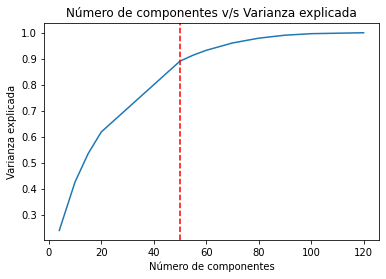

In [79]:
# ALTERNATIVA DE SELECCIÓN DE COMPONENTES MÍNIMOS
# Obtención del número óptimo de componentes para Truncated SVD
import matplotlib.pyplot as plt
n_comp = [4,10,15,20,50,55,60,70,80,90,100,120] # valore de entrada para el número de componentes
explained = [] # Varianza explicada ratio por cada componente de Truncated SVD
for x in n_comp:
    svd = TruncatedSVD(n_components=x)
    svd.fit(X_fr)
    explained.append(svd.explained_variance_ratio_.sum())
    print("Número de componentes = %r y su varianza explicada = %r"%(x,svd.explained_variance_ratio_.sum()))

## Impresión de curva de varianza acumulada según el número de componentes
plt.plot(n_comp, explained)
plt.xlabel('Número de componentes')
plt.ylabel("Varianza explicada")
plt.title("Número de componentes v/s Varianza explicada")
plt.axvline(50,color = 'red',linestyle = '--')
plt.show()

In [80]:
# El número de componentes será el obtenido para contener el 90% de los resultados
SVD_trunc_opt_fr = TruncatedSVD(n_components=80, random_state=1)  
resultant_matrix_trunc_opt_fr = SVD_trunc_opt_fr.fit_transform(X_fr)

# Matriz de correlación
corrMx_trunc_opt_fr = np.corrcoef(resultant_matrix_trunc_opt_fr, )

# Índice del restaurante Subway en la matriz de utilidad
seleccion_trunc_fr = X_fr.index.get_loc('Subway')

# Correlación de esta película, con todas las que se tienen en el catálogo:
corr_recomienda_trunc_fr = corrMx_trunc_opt_fr[seleccion_trunc_fr]

# Obtención de DataFrame con correlaciones de la selección
recom_trunc_fr = list(X_fr.index)
corr_recom_trunc_fr = corr_recomienda_trunc_fr[X_fr.index.get_indexer(recom_trunc_fr)]
df_top_trunc_fr = pd.DataFrame(zip(recom_trunc_fr,corr_recom_trunc_fr), columns = ['Place','Correlación'])

# Obtención del top 10 de recomendaciones (excluyendo a la misma selección)
result_fr_trunc = df_top_trunc_fr.sort_values('Correlación',ascending = False)[1:11]
result_fr_trunc

,Place,Correlación
58,Restaurant Teely,0.845975
60,Restaurant and Bar and Clothesline Carlos N Ch...,0.495653
97,Vips,0.446013
41,Mariscos Tia Licha,0.433267
85,Rincon del Bife,0.411234
86,Sanborns Casa Piedra,0.369937
55,Restaurant Las Mananitas,0.331967
46,Paniroles,0.322199
54,Restaurant Familiar El Chino,0.252105
29,Kiku Cuernavaca,0.250355


Conclusiones:

En primer lugar, en comparación con los resultados obtenidos en los ejercicios anteriores que consideraban el rating general, si consideramos únicamente los resultados con los sistemas que incluyen todos los componentes posibles, se observa que se mantienen sólo el 60% de los resultados, es decir, el sistema de recomendación que considera los ratings  de comida mantienen sólo 6 restaurantes en el top de recomendaciones que se indicaban en el top general, lo cual indica que es posible que su posición en el rating en general sea debido en su mayoría por la calidad en la comida. Por otra parte, es notorio como el orden entre ambos sistemas considerados cambia de manera notorio, especialmente cuando se avanza en el top (se analizan valores con menor correlación).

En segundo lugar, con respecto a la comparación de los sistemas con los componentes mínimos para contener al menos el 90% de los datos, se logra obtener una “mejora” en el desempeño, manteniéndose el 70% de las recomendaciones del sistema de recomendación por rating general, sin embargo, el orden de las mismas tiende a asemejarse más al propio sistema de recomendaciones por rating de comida con todos sus componentes que a su equivalente en el sistema de recomendación por rating general.

Cabe hacer notar que el grado de correlación en los últimos 2 sistemas se asemejan mucho en magnitud a los de los primeros sistemas, indicando sólo una mayor correlación para l primer elemento del top.

Adicionalmente, es notorio que este sistema logre contener el 90% de la información con una cantidad muy semejante de valores singulares al sistema predecesor (este sistema requirió 80 y el anterior 79), esto hace llegar a la conclusión de que lo sistema sse encuentran relativamente correlacionados entre sí de cirta manera.


#**Ejercicio-7.**

7.  Repite los ejercicios 1 a 4 generando ahora la matriz de utilidad en la cual los renglones son los 
usuarios (user_ID), las columnas los nombres de los restaurantes (name) y las entradas la 
evaluación dada al servicio (service_rating). Incluye tus conclusiones. 

Ejercicio 1

In [81]:
# Combinación de los datasets
df_merge_sr = pd.merge(df_rating[['userID','placeID','service_rating']],df_geo[['placeID','name']],on = 'placeID')
df_merge_sr

,userID,placeID,service_rating,name
0,U1077,135085,2,Tortas Locas Hipocampo
1,U1108,135085,1,Tortas Locas Hipocampo
2,U1081,135085,1,Tortas Locas Hipocampo
3,U1056,135085,2,Tortas Locas Hipocampo
4,U1134,135085,2,Tortas Locas Hipocampo
...,...,...,...,...
1156,U1061,132958,2,tacos los volcanes
1157,U1025,132958,0,tacos los volcanes
1158,U1097,132958,1,tacos los volcanes
1159,U1096,132958,2,tacos los volcanes


In [82]:
# Creación de matriz de utilidad: los renglones son los usuarios (user_ID), las columnas los nombres de los restaurantes (name)
matriz_utilidad_sr = df_merge_sr.pivot_table(values = 'service_rating', index = 'userID', columns = 'name', fill_value = 0)
matriz_utilidad_sr

name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Chaires,Cafeteria cenidet,Cafeteria y Restaurant El Pacifico,Carls Jr,Carnitas Mata Calle 16 de Septiembre,Carreton de Flautas y Migadas,Cenaduria El RincÃ³n de Tlaquepaque,Chaires,Chilis Cuernavaca,Dominos Pizza,El Club,El Herradero Restaurante and Bar,El Mundo de la Pasta,El Oceano Dorado,El Rincon de San Francisco,El Rincón de San Francisco,El angel Restaurante,El cotorreo,Giovannis,Gordas de morales,Gorditas Doa Gloria,Gorditas Dona Tota,Hamburguesas La perica,Hamburguesas Valle Dorado,Hamburguesas saul,KFC,Kiku Cuernavaca,Koye Sushi,La Cantina Restaurante,La Estrella de Dimas,La Fontana Pizza Restaurante and Cafe,La Posada del Virrey,La Virreina,Little Cesarz,Log Yin,Los Vikingos,Luna Cafe,Mariscos El Pescador,Mariscos Tia Licha,McDonalds Centro,Mcdonalds Parque Tangamanga,Michiko Restaurant Japones,Mikasa,Paniroles,Pizzeria Julios,Pollo_Frito_Buenos_Aires,Potzocalli,Preambulo Wifi Zone Cafe,Restaurant Bar Coty y Pablo,Restaurant Bar Hacienda los Martinez,Restaurant El Muladar de Calzada,Restaurant Familiar El Chino,Restaurant Las Mananitas,Restaurant Oriental Express,Restaurant Orizatlan,Restaurant Teely,Restaurant Wu Zhuo Yi,Restaurant and Bar and Clothesline Carlos N Charlies,Restaurant de Mariscos de Picon,Restaurant la Chalita,Restaurant los Compadres,Restaurant los Pinos,Restaurante 75,Restaurante Alhondiga,Restaurante Bar El Gallinero,Restaurante Bar Fu-hao,Restaurante Casa de las Flores,Restaurante El Chivero S.A. de C.V.,Restaurante El Cielo Potosino,Restaurante El Reyecito,Restaurante Guerra,Restaurante Marisco Sam,Restaurante Pueblo Bonito,Restaurante Tiberius,Restaurante Versalles,Restaurante de Mariscos la Langosta,Restaurante la Cantina,Restaurante la Estrella de Dima,Restaurante la Gran Via,Restaurante la Parroquia Potosina,Restaurante y Pescaderia Tampico,Rincon Huasteco,Rincon del Bife,Sanborns Casa Piedra,Sirlone,Subway,Sushi Itto,TACOS CORRECAMINOS,TACOS EL GUERO,Taqueria EL amigo,Tortas Locas Hipocampo,Tortas y hamburguesas el gordo,Unicols Pizza,VIPS,Vips,cafe ambar,cafe punta del cielo,carnitas mata calle Emilio Portes Gil,carnitas_mata,churchs,crudalia,dairy queen,don burguers,el lechon potosino,el pueblito,emilianos,la Cantina,la Cochinita Pibil Restaurante Yucateco,la Estrella de Dimas,la parroquia,la perica hamburguesa,little pizza Emilio Portes Gil,los Toneles,palomo tec,pizza clasica,puesto de gorditas,puesto de tacos,rockabilly,shi ro ie,sirloin stockade,tacos abi,tacos de barbacoa enfrente del Tec,tacos de la estacion,tacos los volcanes,tortas hawai,vips
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
U1001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
U1002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
U1003,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,1,0,2,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,1,0,0,0,0,0,0,0,0
U1004,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
U1005,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Ejercicio 2

In [83]:
# Transposición de matriz de utilidad
X_sr = matriz_utilidad_sr.T     # Tomamos la traspuesta para que los renglones sean las películas y las columnas los usuarios.
X_sr.shape

(129, 138)

In [84]:
# El número de componentes debe ser menor que el número de características (features/usuarios), que son 138:
SVD_sr = TruncatedSVD(n_components=max(X_sr.shape) -1, random_state=1)  
resultant_matrix_sr = SVD_sr.fit_transform(X_sr)

Ejercicio 3

In [85]:
# Matriz de correlación
corrMx_sr = np.corrcoef(resultant_matrix_sr, )

# Índice del restaurante Subway en la matriz de utilidad
seleccion_sr = X_sr.index.get_loc('Subway')

# Correlación de esta película, con todas las que se tienen en el catálogo:
corr_recomienda_sr = corrMx_sr[seleccion_sr]


# Obtención de DataFrame con correlaciones de la selección
recom_sr = list(X_sr.index)
corr_recom_sr = corr_recomienda_sr[X_sr.index.get_indexer(recom_sr)]
df_top_sr = pd.DataFrame(zip(recom_sr,corr_recom_sr), columns = ['Place','Correlación'])

# Obtención del top 10 de recomendaciones (excluyendo a la misma selección)
result_sr_ac = df_top_sr.sort_values('Correlación',ascending = False)[1:11]
result_sr_ac

,Place,Correlación
58,Restaurant Teely,0.772973
60,Restaurant and Bar and Clothesline Carlos N Ch...,0.600161
85,Rincon del Bife,0.518731
97,Vips,0.421200
46,Paniroles,0.365934
11,Chilis Cuernavaca,0.230698
55,Restaurant Las Mananitas,0.226266
21,Giovannis,0.192760
54,Restaurant Familiar El Chino,0.182869
29,Kiku Cuernavaca,0.178740


Ejercicio 4

In [86]:
 # El número de componentes debe ser menor que el número de características (features/usuarios), que son 138:
SVD_trunc_sr = TruncatedSVD(n_components=max(X_sr.shape)-1, random_state=1)  
SVD_trunc_sr.fit(X_sr)
num_sv = 79   # En particular los N primeros vectores y valores singulares de mayor magnitud tienen esta cantidad de información.
print('Cantidad de información contenida con los primeros %d vectores singulares:' % num_sv)
print('%.1f%%' %  (100 * ((SVD_trunc_sr.singular_values_[0:num_sv]).sum() / (SVD_trunc_sr.singular_values_).sum())))

Cantidad de información contenida con los primeros 79 vectores singulares:
90.4%


Número de componentes = 4 y su varianza explicada = 0.24422180514542166
Número de componentes = 10 y su varianza explicada = 0.43336993813693625
Número de componentes = 15 y su varianza explicada = 0.538171364919421
Número de componentes = 20 y su varianza explicada = 0.6230633360808913
Número de componentes = 50 y su varianza explicada = 0.8932519567247071
Número de componentes = 55 y su varianza explicada = 0.9168725675938125
Número de componentes = 60 y su varianza explicada = 0.9363467094187834
Número de componentes = 70 y su varianza explicada = 0.9635735056500734
Número de componentes = 80 y su varianza explicada = 0.9803018886515478
Número de componentes = 90 y su varianza explicada = 0.9911301118097459
Número de componentes = 100 y su varianza explicada = 0.9969998063744687
Número de componentes = 120 y su varianza explicada = 0.9999762592764647


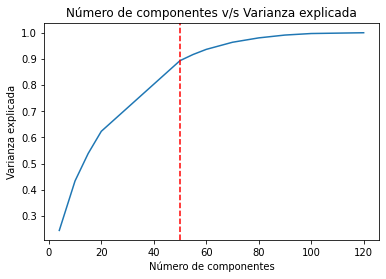

In [87]:
# ALTERNATIVA DE SELECCIÓN DE COMPONENTES MÍNIMOS
# Obtención del número óptimo de componentes para Truncated SVD
import matplotlib.pyplot as plt
n_comp = [4,10,15,20,50,55,60,70,80,90,100,120] # valore de entrada para el número de componentes
explained = [] # Varianza explicada ratio por cada componente de Truncated SVD
for x in n_comp:
    svd = TruncatedSVD(n_components=x)
    svd.fit(X_sr)
    explained.append(svd.explained_variance_ratio_.sum())
    print("Número de componentes = %r y su varianza explicada = %r"%(x,svd.explained_variance_ratio_.sum()))

## Impresión de curva de varianza acumulada según el número de componentes
plt.plot(n_comp, explained)
plt.xlabel('Número de componentes')
plt.ylabel("Varianza explicada")
plt.title("Número de componentes v/s Varianza explicada")
plt.axvline(50,color = 'red',linestyle = '--')
plt.show()

In [88]:
# El número de componentes será el obtenido para contener el 90% de los resultados
SVD_trunc_opt_sr = TruncatedSVD(n_components=55, random_state=1)  
resultant_matrix_trunc_opt_sr = SVD_trunc_opt_sr.fit_transform(X_sr)

# Matriz de correlación
corrMx_trunc_opt_sr = np.corrcoef(resultant_matrix_trunc_opt_sr, )

# Índice del restaurante Subway en la matriz de utilidad
seleccion_trunc_sr = X_sr.index.get_loc('Subway')

# Correlación de esta película, con todas las que se tienen en el catálogo:
corr_recomienda_trunc_sr = corrMx_trunc_opt_sr[seleccion_trunc_sr]

# Obtención de DataFrame con correlaciones de la selección
recom_trunc_sr = list(X_sr.index)
corr_recom_trunc_sr = corr_recomienda_trunc_sr[X_sr.index.get_indexer(recom_trunc_sr)]
df_top_trunc_sr = pd.DataFrame(zip(recom_trunc_sr,corr_recom_trunc_sr), columns = ['Place','Correlación'])

# Obtención del top 10 de recomendaciones (excluyendo a la misma selección)
result_sr_trunc = df_top_trunc_sr.sort_values('Correlación',ascending = False)[1:11]
result_sr_trunc

,Place,Correlación
58,Restaurant Teely,0.950557
60,Restaurant and Bar and Clothesline Carlos N Ch...,0.782069
85,Rincon del Bife,0.713630
46,Paniroles,0.469187
97,Vips,0.436345
21,Giovannis,0.310702
55,Restaurant Las Mananitas,0.243558
11,Chilis Cuernavaca,0.235153
29,Kiku Cuernavaca,0.186490
41,Mariscos Tia Licha,0.174422


Conclusiones:

En primer lugar, es interesante observar la tendencia de correlación menor de este sistema con el de ratings generales, ya que con respecto a este sólo mantiene el 50% de la sugerencia, siendo que en contraste llega al 80% de coincidencia con el sistema de recomendación por rating de comida. 

De manera semejante a lo observado en el ejercicio 6, el presente sistema mantiene mayor correlación con respecto al orden (jerarquía) de sus recomendaciones entre sus sistemas con todos los componentes y el truncado si l comparamos con sus equivalentes con los otros sistemas, aunque es notoria una mayor similitud en el orden con el sistema de ratings por comida que con el sistema de ratings general.

Por otra parte, es notorio nuevamente que el número de valores singulares que contienen el 90% de los datos sea muy semejante al de los sistemas predecesores, siendo que son evaluaciones distintas. 

#**Ejercicio-8.**

8.  Incluye tus conclusiones finales. En particular indica la coincidencia o no de estos tres modelos. 

Para generar las conclusiones generales, es conveniente comparar los resultados de las mismas con el fin de detectar patrones y contrastes. Po rlo que traemos en conjunto los resultados de todos los sistemas generados, tanto los obtenidos con todos los componentes posibles y los obtenidos con  componetes truncados:

In [89]:
print('----------------------- RESULTADOS CON TODOS LOS COMPNENTES -----------------------')
print('----------------------- General Rating -----------------------')
print(result_r_ac)
print('----------------------- Food Rating -----------------------')
print(result_fr_ac)
print('----------------------- Service Rating -----------------------')
print(result_sr_ac)

----------------------- RESULTADOS CON TODOS LOS COMPNENTES -----------------------
----------------------- General Rating -----------------------
                                                Place  Correlación
58                                   Restaurant Teely     0.609521
97                                               Vips     0.506278
85                                    Rincon del Bife     0.429824
60  Restaurant and Bar and Clothesline Carlos N Ch...     0.425467
86                               Sanborns Casa Piedra     0.417219
41                                 Mariscos Tia Licha     0.388178
11                                  Chilis Cuernavaca     0.301090
45                                             Mikasa     0.301002
64                               Restaurant los Pinos     0.285149
37                                            Log Yin     0.234634
----------------------- Food Rating -----------------------
                                                Place  C

In [90]:
print('----------------------- RESULTADOS CON SVD TRUNCADO -----------------------')
print('----------------------- General Rating -----------------------')
print(result_r_trunc)
print('----------------------- Food Rating -----------------------')
print(result_fr_trunc)
print('----------------------- Service Rating -----------------------')
print(result_sr_trunc)

----------------------- RESULTADOS CON SVD TRUNCADO -----------------------
----------------------- General Rating -----------------------
                                     Place  Correlación
114         little pizza Emilio Portes Gil     0.864997
128                                   vips     0.857618
123                              tacos abi     0.845728
118                     puesto de gorditas     0.570818
92                      Taqueria EL amigo      0.521177
8            Carreton de Flautas y Migadas     0.506871
36                           Little Cesarz     0.315863
101                          carnitas_mata     0.265001
25                  Hamburguesas La perica     0.203140
100  carnitas mata calle Emilio Portes Gil     0.177865
----------------------- Food Rating -----------------------
                                                Place  Correlación
58                                   Restaurant Teely     0.845975
60  Restaurant and Bar and Clothesline Carlos N Ch.

Después de analizar dichos resultados y de observar el comportamiento de los sistemas en cuanto a sus resultados y los parámetros obtenidos para la creación de los mismos llegamos a las siguientes conclusiones:

En primer lugar, es notaria la semejanza tanto de resultados de los 3 sistemas que si bien no es completa, sí logra mostrar cierta correlación, especialmente para los valores más correlacionados (los primeros lugares en el top); prueba de ello es el hecho de que en todos los sistemas se logró mantener al "Restaurant Teely" como en primer lugar. Dicha tendencia permite concluir que los 3 sistemas llegarán a brindar resultados semejantes.

Por otra parte, es sobresaliente la observación de cómo todos los sistemas llegan a tener el mismo número de componentes mínimos necesarios para mantener el 90% de su variabilidad (información original), lo anterior permite concluir que muy probablemente la variabilidad de los 3 ratings sea semejante, un hecho esperable ya que los mismos deben ser consistentes entre sí al referirse a una misma experiencia; por lo menos entre el rating general y cualquiera de los otros 2. Sin embargo, contrario a la suposición anterior acerca de la semejanza particular de los modelos, pudo observarse una mayor semejanza entre los sistemas de ratings particulares (de comida y servicio) que con el rating general llegando a mantener hasta un 20% más de las recomendaciones entre los primeros. Esta diferencia inesperada se pudo deber en primera medida a la atención o ponderación que los usuarios pudieran tender a dar a la calificación de un aspecto concreto sobre la evaluación general buscando hacer notar su descontento o satisfacción de manera puntual con mayor cuidado. Lo anterior nos permite concluir que si bien las correlaciones

Con respecto al desempeño de los sistemas SVD truncados en comparación con sus semejantes con todos su componentes, se logró observar en todos los casos una diferencia principalmente en el orden (jerarquía) de las mismas pero en todos los casos manteniendo 9 de las 10 recomendaciones originales, siendo consistente con lo esperado con la reducción de componentes con lo cual se concluyó que la reducción de dimensionalidad sí logra mantener el porcentaje estipulado en la evaluación de varianza acumulada.


Adiconalmente, debido a las observaciones anteriores, llegamos a pensar que dicha similitud podría ser explicada debido al elevado grado de correlación de los ratings entre sí, es decir, que los sistemas brindaban reultados muy semejantes debido a que los mismos se encontraban sumamente correlacionados. Por lo cual decidimos inspeccionar dicha correlación numérica, como se muestra a contnucación. 

In [91]:
# Matriz de correlación entre ratings
df_rating[['rating','food_rating','service_rating']].corr()

,rating,food_rating,service_rating
rating,1.000000,0.714855,0.690757
food_rating,0.714855,1.000000,0.647177
service_rating,0.690757,0.647177,1.000000


Dichos resultados nos parecieron razonables, sin embargo, quisimos observar qu pasaría si eliminabamos de dicha correlación los registris con 0, de estamanera pdríamos observar de cierta manera el grado de correlación real de los ratings de manera semjante como lo haría SVD truncado (con solo los componenets esenciales).

In [92]:
# Matriz de correlación para valores con resgistrso sin 0
df_rating.loc[(df_rating[['rating','food_rating','service_rating']] != 0 ).all(axis = 1), ['rating','food_rating','service_rating']].corr()

,rating,food_rating,service_rating
rating,1.000000,0.466720,0.514103
food_rating,0.466720,1.000000,0.467422
service_rating,0.514103,0.467422,1.000000


Con lo anterior observamos que decartando los 0 las correlaciones lógicamente disminuyen. Por lo anterior, que los sistemas truncados logren mantener la relación entre las variables nos permite concluir que los sistemas de recomendación manteienen su relación únicamente a partir de la relación sintetizada de los diversos registros entre las evaluaciones de los diferentes usuarios y cuya tendencia se mantienen a lo largo de las 3 métricas.

Adicionalmente a lo anterior, después de realizar diversas pruebas con una cantidad mínima de componentes pudimos observar que el sistema de recomendación tendía a comportarse muy bien para el conjunto de datos de rating general (manteniendo el 90% de las recomendaciones originales) pero teniendo un terrible comportamiento para sistemas de rating de comida y servicio, llegando a tener desempeños de solo el 10%, esto se tribuyó en un principio a que posiblemente existieran mayor cantidad de ratings generales que particulares pero esto fue refutado por los resultados mostrados a continucación. Por lo anterior, se optó por mantener la cantidad mínima de componentes sugerida por el explained_variance_ratio; de esta manera siempre se aseguró mantener el 90% de lso resultados habiendo reducido la dimensionalidad de los datos.

In [93]:
df_rating['rating'].astype('category').value_counts()

2    486
1    421
0    254
Name: rating, dtype: int64

In [94]:
df_rating['food_rating'].astype('category').value_counts()

2    516
1    379
0    266
Name: food_rating, dtype: int64

In [95]:
df_rating['service_rating'].astype('category').value_counts()

1    426
2    420
0    315
Name: service_rating, dtype: int64

###**Fin de la Actividad de la semana 10 - Sistemas de Recomendación y Reducción de Dimensionalidad con SVD.**